In [75]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt 
import json


In [76]:
orders = json.load(open("../1_environment/slapstack/slapstack/use_cases/wepastacks/2_orders.json")) 
initial_fill = json.load(open("../1_environment/slapstack/slapstack/use_cases/wepastacks/3_initial_fill_lvl.json"))

In [77]:
order_columns = ['type', 'sku', 'time', 'dock', 'batch', 'week']
order_df = pd.DataFrame(orders, columns=order_columns)

# Sort the orders by time
order_df = order_df.sort_values(by='time').reset_index(drop=True)

# Calculate the time difference between consecutive orders
order_df['time_diff'] = order_df['time'].diff()

# Define a threshold for breaks (e.g., 1200 seconds for a 20-minute break)
threshold = 1200

# Identify breaks
breaks = order_df[order_df['time_diff'] > threshold]

# Display the breaks
print(breaks[['time', 'time_diff']])

           time  time_diff
596      172800    68700.0
14218    345600    12410.0
16296    432000    20665.0
21875    518400     9312.0
30262    691282     7308.0
...         ...        ...
392997  7430400    33672.0
399742  7516800    18535.0
411575  7650000     1320.0
411615  7653600     3240.0
411715  7657200     3600.0

[77 rows x 2 columns]


In [78]:
order_df[order_df["week"]==1]

type  sku    time  dock  batch  week  time_diff
0    delivery   59   86466     3      3     1        NaN
1    delivery   68   86469     2      4     1        3.0
2    delivery   20   86488     1      2     1       19.0
3    delivery   18   86518     4      1     1       30.0
4    delivery   59   86532     3      3     1       14.0
..        ...  ...     ...   ...    ...   ...        ...
591  delivery   18  103628     4      1     1      118.0
592  delivery   18  103746     4      1     1      118.0
593  delivery   18  103864     4      1     1      118.0
594  delivery   18  103982     4      1     1      118.0
595  delivery   18  104100     4      1     1      118.0

[596 rows x 7 columns]

In [84]:
590215 / 3600

9836.916666666666

In [86]:
order_df[order_df["week"]==4].iloc[-1]['time'] - order_df[order_df["week"]==4].iloc[0]['time']

592783

In [87]:
order_df['day'] = order_df['time'] // (24 * 3600)

In [106]:
order_df

type  sku     time  dock  batch  week  time_diff  day
0        delivery   59    86466     3      3     1        NaN    1
1        delivery   68    86469     2      4     1        3.0    1
2        delivery   20    86488     1      2     1       19.0    1
3        delivery   18    86518     4      1     1       30.0    1
4        delivery   59    86532     3      3     1       14.0    1
...           ...  ...      ...   ...    ...   ...        ...  ...
411825  retrieval   11  7657200     4   7391    14        0.0   88
411826  retrieval   11  7657200     4   7391    14        0.0   88
411827  retrieval   11  7657200     4   7391    14        0.0   88
411828  retrieval   17  7657200     7   7398    14        0.0   88
411829  retrieval  112  7657200     2   7468    14        0.0   88

[411830 rows x 8 columns]

In [105]:
orders[0]

['delivery', 59, 86466, 3, 3, 1]

In [108]:
# Group orders by week and then by day within each week
order_data_by_day = {}
for order in orders:
    week = order[-1]  # Assuming week is the last item in the order tuple
    time = order[2]  # Assuming time is the second-to-last item in the order tuple
    day = time // 86400  # Calculate the day within the week
    print(day)

    if week not in order_data_by_day:
        order_data_by_day[week] = {}
    if day not in order_data_by_day[week]:
        order_data_by_day[week][day] = []
    
    order_data_by_day[week][day].append(order)

# initial_pallets_path = f"partitions/0_partition_fill_lvl.json"
# with open(join(root_dir, initial_pallets_path), 'w', encoding='utf8') as json_file:
#     json.dump(skus_ini, json_file, ensure_ascii=False)

# skus = deepcopy(skus_ini)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [102]:
def analyze_daily_partitions(partition_dir, total_capacity=19512):
    daily_fill_levels = []
    days = []

    # Loop through each partition file for daily data
    for day in range(0, 7):  # Assuming 7 days per week for each week
        partition_order_path = f"{partition_dir}/{day}_partition_orders.json"
        fill_lvl_path = f"{partition_dir}/{day+1}_partition_fill_lvl.json"

        # Load orders and fill levels
        try:
            with open(partition_order_path, 'r') as orders_file:
                orders = json.load(orders_file)
            with open(fill_lvl_path, 'r') as fill_file:
                fill_levels = json.load(fill_file)
        except FileNotFoundError:
            print(f"File for day {day} not found.")
            continue

        # Calculate net daily stock change
        net_daily_change = sum(1 if order[0] == "delivery" else -1 for order in orders)
        daily_fill_levels.append(sum(fill_levels.values()) / total_capacity)
        days.append(day)

    # Create a DataFrame for analysis
    df = pd.DataFrame({'day': days, 'fill_level': daily_fill_levels})

    # Plot daily fill levels
    plt.figure(figsize=(10, 6))
    plt.plot(df['day'], df['fill_level'], marker='o', label='Fill Level (% of Capacity)')
    plt.xlabel('Day')
    plt.ylabel('Fill Level')
    plt.title('Daily Fill Levels Over the Week')
    plt.legend()
    plt.grid()
    plt.show()
    
    return df

def identify_peak_days(df):
    peak_day = df.loc[df['fill_level'].idxmax()]
    low_supply_day = df.loc[df['fill_level'].idxmin()]
    
    print("Peak Supply Day:", peak_day)
    print("Lowest Supply Day:", low_supply_day)

# Example usage:
df = analyze_daily_partitions("path/to/partitions")
identify_peak_days(df)

{0: [['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retrieval', 6, 172800, 10, 4, 2],
  ['retri

In [23]:
def process_orders_by_week(orders, initial_fill):
    # Create a DataFrame from the orders
    order_columns = ['type', 'sku', 'time', 'dock', 'batch', 'week']
    order_df = pd.DataFrame(orders, columns=order_columns)
    order_df['day'] = order_df['time'] // (24 * 3600)
    
    # Initialize the fill levels from the initial fill data
    fill_levels = initial_fill.copy()

    # Store fill levels at the beginning of each week
    weekly_fill_levels = {}

    # Process orders week by week
    for week in sorted(order_df['week'].unique()):
        # Get orders for the current week
        weekly_orders = order_df[order_df['week'] == week]
        
        # Store the fill level at the beginning of the week
        weekly_fill_levels[week] = fill_levels.copy()
        
        # Process each order for the current week
        for _, order in weekly_orders.iterrows():
            order_type, sku = order['type'], str(order['sku'])
            
            # For delivery, increase the stock of the SKU
            if order_type == "delivery":
                fill_levels[sku] = fill_levels.get(sku, 0) + 1
            # For retrieval, decrease the stock of the SKU
            elif order_type == "retrieval":
                fill_levels[sku] = fill_levels.get(sku, 0) - 1

    return weekly_fill_levels, order_df

# Process the orders and calculate weekly fill levels
weekly_fill_levels, order_df = process_orders_by_week(orders, initial_fill)

# Print the fill levels at the beginning of each week
for week, fill in weekly_fill_levels.items():
    print(f"Week {week}: Fill levels: {fill}")

Week 1: Fill levels: {'1': 1, '2': 268, '3': 157, '4': 5, '6': 28, '7': 461, '8': 74, '9': 375, '10': 187, '11': 308, '12': 138, '17': 526, '18': 453, '20': 28, '21': 102, '23': 34, '24': 4, '25': 52, '26': 229, '27': 262, '28': 1154, '29': 271, '30': 611, '31': 62, '32': 36, '33': 961, '34': 85, '35': 270, '38': 278, '39': 268, '43': 469, '45': 4, '46': 11, '49': 39, '50': 83, '52': 10, '53': 1095, '54': 2, '57': 202, '58': 36, '59': 88, '61': 203, '62': 1857, '63': 246, '64': 179, '65': 39, '67': 126, '68': 484, '69': 3, '70': 12, '72': 6, '73': 3, '75': 2, '78': 218, '79': 659, '81': 1, '82': 3, '83': 27, '84': 10, '85': 42, '86': 22, '89': 73}
Week 2: Fill levels: {'1': 1, '2': 268, '3': 157, '4': 5, '6': 28, '7': 461, '8': 74, '9': 375, '10': 187, '11': 308, '12': 138, '17': 526, '18': 603, '20': 166, '21': 102, '23': 34, '24': 4, '25': 52, '26': 229, '27': 262, '28': 1154, '29': 271, '30': 611, '31': 62, '32': 36, '33': 961, '34': 85, '35': 270, '38': 278, '39': 268, '43': 469, '

C:\Users\zm0714\AppData\Local\Temp\ipykernel_28940\812140238.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_week_orders['hour'] = order_df['time'] // 3600  # Convert time to hours


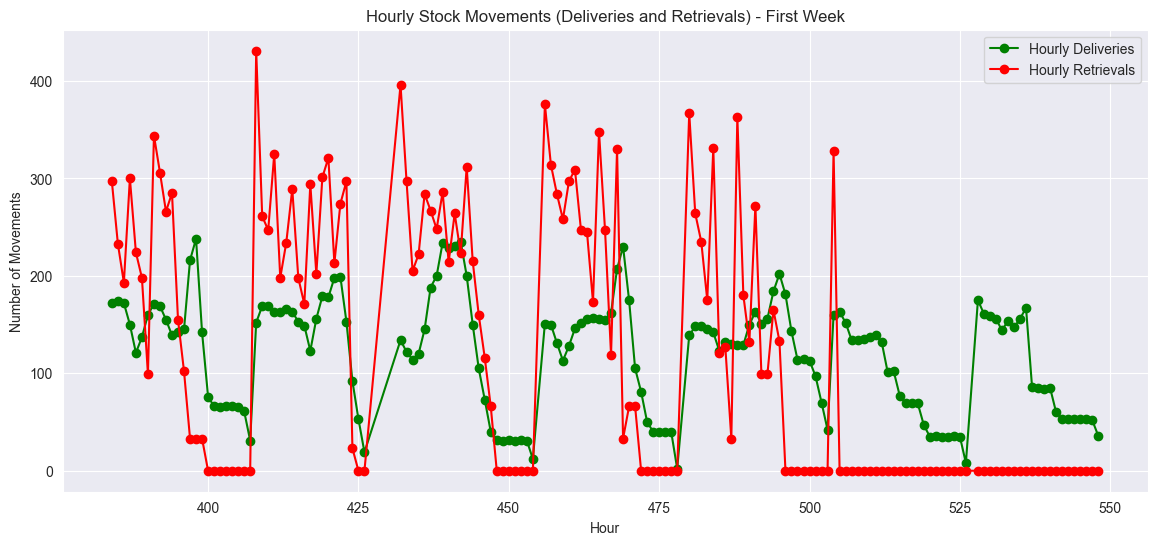

In [58]:
import matplotlib.pyplot as plt

# Function to visualize hourly stock movements (deliveries and retrievals)
def visualize_hourly_stock_movements(weekly_fill_levels, order_df, week=1):
    # Filter the orders for the given week and get the unique hours within this week
    first_week_orders = order_df[order_df['week'] == week]
    first_week_orders['hour'] = order_df['time'] // 3600  # Convert time to hours
    hours_in_week = sorted(first_week_orders['hour'].unique())

    # Initialize fill levels for aggregation at the start of the week
    fill_levels_at_start = weekly_fill_levels[week].copy()

    # Store the hourly changes in stock
    hourly_delivery_movements = []
    hourly_retrieval_movements = []
    
    # Process each hour within the week
    for hour in hours_in_week:
        hour_orders = first_week_orders[first_week_orders['hour'] == hour]

        # Track delivery and retrieval counts for the hour
        hourly_deliveries = 0
        hourly_retrievals = 0

        # Process each order within the hour
        for _, order in hour_orders.iterrows():
            order_type, sku = order['type'], str(order['sku'])
            if order_type == "delivery":
                hourly_deliveries += 1
                fill_levels_at_start[sku] = fill_levels_at_start.get(sku, 0) + 1
            elif order_type == "retrieval":
                hourly_retrievals += 1
                fill_levels_at_start[sku] = fill_levels_at_start.get(sku, 0) - 1

        # Append the hourly movements (deliveries and retrievals)
        hourly_delivery_movements.append(hourly_deliveries)
        hourly_retrieval_movements.append(hourly_retrievals)
    
    # Plot the hourly stock movements (deliveries and retrievals)
    plt.figure(figsize=(14, 6))
    plt.plot(hours_in_week, hourly_delivery_movements, label="Hourly Deliveries", color='g', marker='o')
    plt.plot(hours_in_week, hourly_retrieval_movements, label="Hourly Retrievals", color='r', marker='o')

    plt.title("Hourly Stock Movements (Deliveries and Retrievals) - First Week")
    plt.xlabel("Hour")
    plt.ylabel("Number of Movements")
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Example usage:
# Call visualize_hourly_stock_movements with the data processed
visualize_hourly_stock_movements(weekly_fill_levels, order_df, week=4)


In [39]:
order_df.groupby(by="week").count() 

type    sku   time   dock  batch    day
week                                          
1       596    596    596    596    596    596
2     31691  31691  31691  31691  31691  31691
3     34610  34610  34610  34610  34610  34610
4     37134  37134  37134  37134  37134  37134
5     36978  36978  36978  36978  36978  36978
6     36668  36668  36668  36668  36668  36668
7     33250  33250  33250  33250  33250  33250
8     32453  32453  32453  32453  32453  32453
9     28102  28102  28102  28102  28102  28102
10    30229  30229  30229  30229  30229  30229
11    31837  31837  31837  31837  31837  31837
12    30341  30341  30341  30341  30341  30341
13    29108  29108  29108  29108  29108  29108
14    18833  18833  18833  18833  18833  18833

In [32]:
i = 0
print(len(orders))
orders_new = []
for order in orders:
    if i < 20000:
        orders_new.append(order)
    else:
        break
    i += 1

411830


In [22]:
len(orders_new)

20000

In [18]:
#del orders_new[300000:320000]

In [26]:
json.dump(orders_new, open("../1_environment/slapstack/slapstack/use_cases/wepastacks_bm/2_orders.json", "w"))

In [69]:
use_case = "wepastacks"

In [70]:
layout = pd.read_csv(f"../1_environment/slapstack/slapstack/use_cases/{use_case}/1_layout.csv", header=None, delimiter=",")

In [71]:
layout.dropna(axis=1, how='all', inplace=True)

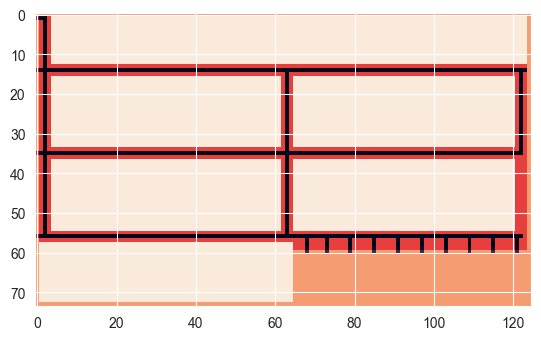

In [72]:
plt.imshow(layout)

In [73]:
def gen_charging_stations(layout, n_cs):
    charging_locs = [len(layout.columns) * i // (n_cs + 1) for i in range(1, n_cs + 1)]
    aisle = pd.DataFrame({i: -1 if i == 0 or i == len(layout.columns)-1 else -6 if i in charging_locs else -2 for i in range(len(layout.columns))}, index=[1])
    aisle1 = pd.DataFrame({i: -1 if i == 0 or i == len(layout.columns)-1 else -5 if i in charging_locs else -2 for i in range(len(layout.columns))}, index=[2])
    line = pd.DataFrame({i: -1 if i == 0 or i == len(layout.columns)-1 else -2 if i == 1 else -5 for i in range(len(layout.columns))}, index=[3])
    aisle2 = pd.DataFrame({i: -1 if i == 0 or i == len(layout.columns)-1 else -5 if i == 2 else -2 for i in range(len(layout.columns))}, index=[4])
    
    layout_new = pd.concat([layout.iloc[:1], aisle, aisle1, line, aisle2, layout.iloc[1:]]).reset_index(drop=True)
    return layout_new

def gen_charging_stations_left(layout, n_cs):
    # Calculate the positions for charging stations
    charging_locs = [len(layout.index) * i // (n_cs + 1) for i in range(1, n_cs + 1)]
    
    # Create new columns for the charging stations and aisles
    aisle = pd.Series({i: -1 if i == 0 or i == len(layout.index)-1 else -6 if i in charging_locs else -2 for i in range(len(layout.index))})
    aisle1 = pd.Series({i: -1 if i == 0 or i == len(layout.index)-1 else -5 if i in charging_locs else -2 for i in range(len(layout.index))})
    #line = pd.Series({i: -1 if i == 0 or i == len(layout.index)-1 else -2 if i == 1 else -5 for i in range(len(layout.index))})
    # aisle2 = pd.Series({i: -1 if i == 0 or i == len(layout.index)-1 else -5 if i in charging_locs else -2 for i in range(len(layout.index))})
    # aisle3 = pd.Series({i: -1 if i == 0 or i == len(layout.index)-1 else -5 if i in charging_locs else -2 for i in range(len(layout.index))})
    
    # Concatenate the new columns with the existing layout, preserving the structure
    layout_new = pd.concat([
        layout.iloc[:, :1],  # First column of original layout
        pd.DataFrame({0: aisle, 1: aisle1}),  # New columns
        layout.iloc[:, 2:]  # Rest of the original layout
    ], axis=1)
    
    # Reset and rename the columns
    layout_new.columns = range(len(layout_new.columns))
    
    return layout_new
    

In [74]:
if use_case == "wepastacks":
    layout_new = gen_charging_stations(layout, 4)
elif use_case == "crossstacks":
    layout_new = gen_charging_stations_left(layout, 4)

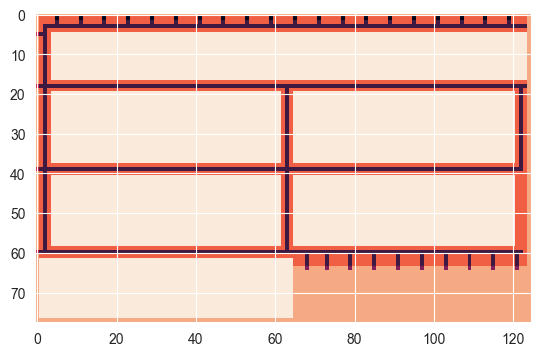

In [66]:
plt.imshow(layout_new)

In [67]:
layout_new.to_csv(f"../1_environment/slapstack/slapstack/use_cases/{use_case}_bm/1_layout.csv", header=None, index=False)

In [ ]:
import json
root_dir_partitions = '../1_environment/slapstack/slapstack/use_cases/wepastacks_bm/partitions/'

def load_partitions_data(path):
    col_orders = ["order", "SKU", "arrival", "dock", "batch", "week"]
    col_fill_lvl = ["SKU", "amount"]
    orders = json.load(open(f'{path}_orders.json')) 
    fill_level = json.load(open(f'{path}_fill_lvl.json')) 
    return (pd.DataFrame(columns=col_orders, data=orders), 
            pd.DataFrame.from_dict(data=fill_level, orient='index'))

orders_dict = dict({})
fill_lvls_dict = dict({})
n_partitions = 20

for pt_idx in range(n_partitions):
    orders_dict[pt_idx] = []
    fill_lvls_dict[pt_idx] = []
    orders, fill_level = load_partitions_data(f'{root_dir_partitions}{pt_idx}_partition')
    if orders is not None:
        orders_dict[pt_idx].append(orders)
    if fill_level is not None:
        fill_lvls_dict[pt_idx].append(fill_level)
        
total_locations = 19512
fill_lvls = []
for pt_idx in range(n_partitions):
    fill_lvls.append(float((fill_lvls_dict[pt_idx][0].sum() / total_locations) * 100))
    
def agg_overall_stocklevels(row):
    global current_stock_overall
    
    #update current_stock_overall
    current_level = row['amount_change'] + current_stock_overall
    current_stock_overall = current_level
    return current_level

def convert_time(row):
    return pd.Timestamp(row["arrival"], unit='s') 

total_locations = 19512

for idx in orders_dict.keys():
    current_partition = orders_dict[idx][0]
    current_partition.loc[current_partition['order'] == 'retrieval', 'amount_change'] = -1
    current_partition.loc[current_partition['order'] == 'delivery', 'amount_change'] = 1

    current_stock_overall = fill_lvls_dict[idx][0].sum()
    
    current_partition['current_stock_overall'] = current_partition.apply(agg_overall_stocklevels, axis = 1)
    current_partition["fill_level"] = current_partition["current_stock_overall"] / total_locations
    
    current_partition["arrival_datetime"] = current_partition.apply(lambda x: convert_time(x), axis=1)
    current_partition["date"] = current_partition["arrival_datetime"].apply(lambda x: x.strftime("%Y-%m-%d"))
    current_partition["day"] = current_partition["arrival_datetime"].apply(lambda x: x.weekday())
    current_partition["hour"] = current_partition["arrival_datetime"].apply(lambda x: x.hour)
    current_partition["partition"] = idx
    try:
        assert  fill_lvls_dict[idx+1][0].sum()[0] == current_partition.iloc[-1]["current_stock_overall"]
    except KeyError:
        print("Key")